#**Preprocessing Tweets & Making Wordclouds**

##**Get Tweets**

In [230]:
bearer_token="AAAAAAAAAAAAAAAAAAAAAOtrdQEAAAAA6J8H1Fp401LkRK1Il%2BKgFZol39Q%3D0mpWTbKzCmyeLS06e0H2ueyJc6a6GbXOvEHODPHDvvB71YKItq"

In [1]:
!pip install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 1.1 MB/s 
     |████████████████████████████████| 62 kB 742 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [181]:
import tweepy
client = tweepy.Client(bearer_token=bearer_token) #Tell tweepy who you are

https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

![](https://drive.google.com/uc?export=view&id=13GQVfc7FSpq6rgZwet6hlbvEDbDgJrr-)

In [35]:
query = '#AI -is:retweet lang:en' 
#look for tweets that contain the words AI or Artificial Intelligence

tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100)

text_list = []
for tweet in tweets.data:
    #print(tweet.text)
    print(tweet)
    text_list.append(tweet.text)

text_list

John Cena becomes the new anchor of the CBS Evening News 

#DALL·E #craiyon #wrestling #AI #draw #model #models #modeling #CPUimaging #WrestlingAI #Thuganomics https://t.co/zNTSBGoBRN
The latest Digital Transformation and Innovation.! https://t.co/76c21YH611 Thanks to @55ueue55 #ai #machinelearning
#China #Russia #AI
✅The Soviet Union, where Stalin’s notion of ‘engineering the soul’ was first pursued, in practice fell far short of what the Chinese Communists have achieved in psychological engineering.”
https://t.co/k9sDG9gyxG
https://t.co/JUkgsWq11X
https://t.co/MChyGUqVpu
Top 600+ Data Science Interview Question and Answers

https://t.co/ylh5VeKGX3

#HIVE #hiveswap #hiveworks #hivegang #Apache #Bigdata #Hadoop #DataWarehouse #DataAnalytics #InterviewTips #jobseekers #ML #DataScience #BigData #Analytics #AI #IIoT #PyTorch #Python #RStats https://t.co/RKlxQFbW7g
Modular raises $30M to ease AI development and deployment - SiliconANGLE #roboticsainews #ai #artificialintelligence #digitalt

['John Cena becomes the new anchor of the CBS Evening News \n\n#DALL·E #craiyon #wrestling #AI #draw #model #models #modeling #CPUimaging #WrestlingAI #Thuganomics https://t.co/zNTSBGoBRN',
 'The latest Digital Transformation and Innovation.! https://t.co/76c21YH611 Thanks to @55ueue55 #ai #machinelearning',
 '#China #Russia #AI\n✅The Soviet Union, where Stalin’s notion of ‘engineering the soul’ was first pursued, in practice fell far short of what the Chinese Communists have achieved in psychological engineering.”\nhttps://t.co/k9sDG9gyxG\nhttps://t.co/JUkgsWq11X\nhttps://t.co/MChyGUqVpu',
 'Top 600+ Data Science Interview Question and Answers\n\nhttps://t.co/ylh5VeKGX3\n\n#HIVE #hiveswap #hiveworks #hivegang #Apache #Bigdata #Hadoop #DataWarehouse #DataAnalytics #InterviewTips #jobseekers #ML #DataScience #BigData #Analytics #AI #IIoT #PyTorch #Python #RStats https://t.co/RKlxQFbW7g',
 'Modular raises $30M to ease AI development and deployment - SiliconANGLE #roboticsainews #ai #arti

##**Preprocessing Step 1 : Tweet Preprocessor**

https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e

In [46]:
print(text_list[2]) #has unnecessary data like hashtags and links

#China #Russia #AI
✅The Soviet Union, where Stalin’s notion of ‘engineering the soul’ was first pursued, in practice fell far short of what the Chinese Communists have achieved in psychological engineering.”
https://t.co/k9sDG9gyxG
https://t.co/JUkgsWq11X
https://t.co/MChyGUqVpu


In [182]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import preprocessor as p

In [38]:
print(text_list[2])
print()
p.clean(text_list[2]) #p.clean removes hashtags, emojis, and links, only returning the tweet data

#China #Russia #AI
✅The Soviet Union, where Stalin’s notion of ‘engineering the soul’ was first pursued, in practice fell far short of what the Chinese Communists have achieved in psychological engineering.”
https://t.co/k9sDG9gyxG
https://t.co/JUkgsWq11X
https://t.co/MChyGUqVpu



'Soviet Union, where Stalins notion of engineering the soul was first pursued, in practice fell far short of what the Chinese Communists have achieved in psychological engineering.'

In [41]:
clean_list = []
for text in text_list:
  clean_list.append(p.clean(text))

In [45]:
clean_list #this is as far as tweet-preprocessor takes us

['John Cena becomes the new anchor of the CBS Evening News',
 'The latest Digital Transformation and Innovation.! Thanks to',
 'Soviet Union, where Stalins notion of engineering the soul was first pursued, in practice fell far short of what the Chinese Communists have achieved in psychological engineering.',
 'Top + Data Science Interview Question and Answers',
 'Modular raises $30M to ease AI development and deployment - SiliconANGLE',
 '- With recent leaps in the technology, companies havedeveloped more systemsthat can produce seemingly humanlike conversation, poetry and images. Yet AI ethicists and researchers warn that some businesses are exaggerating',
 '*tropical hack to get thin at the link in my profile.',
 'via NodeXL hashtags: /',
 'RE-FLUO by Francesca Fini What happens when we take a selfie with a bad d scanner?A constant negotiation between your intentions and AI unpredictable outputs.',
 'The latest The CONNECTpreneur Daily! Thanks to',
 '*tropical hack to get thin at the

##**Preprocessing Step 2 : Remove Digits & Punctuation**

In [125]:
#convert list into pandas object = easy to deal with
import pandas as pd
import re
data = pd.Series(clean_list) #convert to pandas object, easier to handle
data

0     John Cena becomes the new anchor of the CBS Ev...
1     The latest Digital Transformation and Innovati...
2     Soviet Union, where Stalins notion of engineer...
3     Top + Data Science Interview Question and Answers
4     Modular raises $30M to ease AI development and...
                            ...                        
95    insurtechforum "RT : Lets HELP you recover you...
96                                    Network Essential
97    A Generative Adversarial Network combines the ...
98                          When to use which language?
99    'Minecraft Legends' is a new action-strategy g...
Length: 100, dtype: object

**Remove Digits** pandas.Series.replace

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [126]:
#replace
data = data.astype(str).str.replace('\d+', '') #replace all digits to blank space \d means all numeric characters(0-9)

lower_text = data.str.lower() #lower all capital letters to lower case

lower_text #digits removed, but punctuations still remain

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0     john cena becomes the new anchor of the cbs ev...
1     the latest digital transformation and innovati...
2     soviet union, where stalins notion of engineer...
3     top + data science interview question and answers
4     modular raises $m to ease ai development and d...
                            ...                        
95    insurtechforum "rt : lets help you recover you...
96                                    network essential
97    a generative adversarial network combines the ...
98                          when to use which language?
99    'minecraft legends' is a new action-strategy g...
Length: 100, dtype: object

**Remove Punctuation**

https://cosmosproject.tistory.com/180

https://docs.python.org/3/library/re.html

We've used re.findall in Professor Jo's KSDS class to find certain words in string data.
This time we'll use re.sub

In [179]:
import re #regular expressions

string1 = "[\'][string][\"\'with/[punctuations012]"

#\w = a-zA-Z0-9, \s = \t\n\r\f\v
new_string1 = re.sub(r'[^\w]', '', (string1)) #\w = every character in the alphabet + every number, /s = every white space(space, enter, tab etc), ^ = Other than
#removes everything except blank spaces and english+numeric characters

new_string1

'stringwithpunctuations012'

In [128]:
def remove_punctuation(text_list):
  new_text_list = []
  for text in text_list:
    new_word = re.sub(r'[^\w\s]', '', (text))
    if new_word != '':
       new_text_list.append(new_word)

  return new_text_list

In [129]:
data = pd.Series(remove_punctuation(lower_text))

In [130]:
data #Now we have pure text data

0     john cena becomes the new anchor of the cbs ev...
1     the latest digital transformation and innovati...
2     soviet union where stalins notion of engineeri...
3      top  data science interview question and answers
4     modular raises m to ease ai development and de...
                            ...                        
95    insurtechforum rt  lets help you recover your ...
96                                    network essential
97    a generative adversarial network combines the ...
98                           when to use which language
99    minecraft legends is a new actionstrategy game...
Length: 100, dtype: object

##**Preprocessing Step 3 : NLTK (Natural Language Toolkit) Preprocessing**

In [47]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Remove Stopwords**

https://stackoverflow.com/questions/54573853/nltk-available-languages-for-stopwords

In [233]:
#the wordcloud stopword set only had english stopwords, but NLTK supports 24 languages.
from nltk.corpus import stopwords

stopwords.words('french')
stopwords.words('indonesian')
print(stopwords.fileids())
print(len(stopwords.fileids()))

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
24


In [131]:
stop_words = set(stopwords.words('english')) 

data_tokens = []

for sent in data:
  for word in sent.split():
    if word not in stop_words:
      data_tokens.append(word)

**Lemmatize**

https://www.geeksforgeeks.org/python-lemmatization-with-nltk/


In [ ]:
nltk.download('omw-1.4')

In [159]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
print("studying : ", lemmatizer.lemmatize("studying", "v"))

rocks : rock
corpora : corpus
studying :  study


In [139]:
lemm_data=[]

for data in data_tokens:
  lemm_data.append(lemmatizer.lemmatize(data))

print(lemm_data)

['john', 'cena', 'becomes', 'new', 'anchor', 'cbs', 'evening', 'news', 'latest', 'digital', 'transformation', 'innovation', 'thanks', 'soviet', 'union', 'stalin', 'notion', 'engineering', 'soul', 'first', 'pursued', 'practice', 'fell', 'far', 'short', 'chinese', 'communist', 'achieved', 'psychological', 'engineering', 'top', 'data', 'science', 'interview', 'question', 'answer', 'modular', 'raise', 'ease', 'ai', 'development', 'deployment', 'siliconangle', 'recent', 'leap', 'technology', 'company', 'havedeveloped', 'systemsthat', 'produce', 'seemingly', 'humanlike', 'conversation', 'poetry', 'image', 'yet', 'ai', 'ethicist', 'researcher', 'warn', 'business', 'exaggerating', 'tropical', 'hack', 'get', 'thin', 'link', 'profile', 'via', 'nodexl', 'hashtags', 'refluo', 'francesca', 'fini', 'happens', 'take', 'selfie', 'bad', 'scannera', 'constant', 'negotiation', 'intention', 'ai', 'unpredictable', 'output', 'latest', 'connectpreneur', 'daily', 'thanks', 'tropical', 'hack', 'get', 'thin', '

In [160]:
from collections import Counter
count_lemm_data = Counter(lemm_data)
count_lemm_data.pop("get")
sorted_lemm = sorted(count_lemm_data.items(), key=lambda kv: kv[1], reverse = True)
sorted_lemm

[('latest', 12),
 ('ai', 11),
 ('tropical', 11),
 ('hack', 11),
 ('thin', 11),
 ('link', 11),
 ('profile', 11),
 ('thanks', 8),
 ('daily', 8),
 ('amp', 8),
 ('learning', 6),
 ('new', 5),
 ('via', 5),
 ('data', 4),
 ('question', 4),
 ('answer', 4),
 ('time', 4),
 ('model', 4),
 ('one', 4),
 ('top', 3),
 ('science', 3),
 ('interview', 3),
 ('technology', 3),
 ('image', 3),
 ('take', 3),
 ('here', 3),
 ('solution', 3),
 ('device', 3),
 ('mt', 3),
 ('coffee', 3),
 ('cup', 3),
 ('article', 3),
 ('go', 3),
 ('great', 3),
 ('worth', 3),
 ('machine', 3),
 ('language', 3),
 ('music', 3),
 ('digital', 2),
 ('engineering', 2),
 ('fell', 2),
 ('raise', 2),
 ('company', 2),
 ('researcher', 2),
 ('business', 2),
 ('apache', 2),
 ('faq', 2),
 ('response', 2),
 ('service', 2),
 ('credit', 2),
 ('real', 2),
 ('iot', 2),
 ('would', 2),
 ('information', 2),
 ('combine', 2),
 ('joined', 2),
 ('god', 2),
 ('light', 2),
 ('intelligence', 2),
 ('help', 2),
 ('change', 2),
 ('welcome', 2),
 ('talk', 2),
 ('ch

##**Create Wordcloud**


![](https://drive.google.com/uc?export=view&id=1jdwfRgNQXpa7YecsD-Y46_ncL-U6n9T2)

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
#import wordcloud, matplotlib
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

font_path = 'drive/My Drive/발표 사진자료/Glory Mathilda.ttf'
mask = np.array(Image.open('drive/My Drive/발표 사진자료/AI_cropped_2.jpg'))
mask_colors = ImageColorGenerator(mask)

def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 200 #hue
    s = 100 #saturation
    l = random_state.randint(30, 70) #lightness
    return "hsl({}, {}%, {}%)".format(h, s, l)


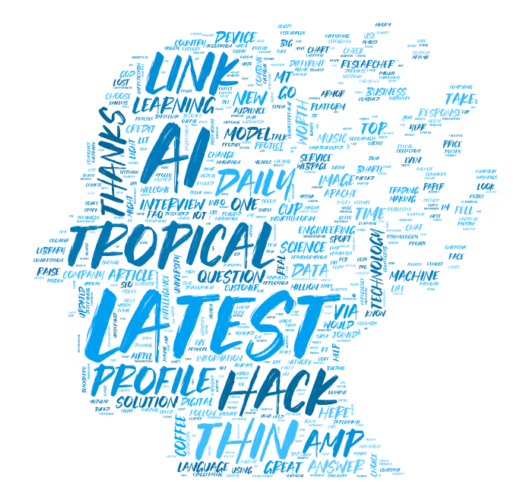

In [163]:
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=1000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=similar_color_func)

wc.generate_from_frequencies(count_lemm_data) #use generate_from_frequencies instead of generate

plt.figure(figsize=(9,9))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()